# <center><h1><u>Computers Network Project</u></h1></center>



 ## Presented by:
  * **Kfir Zilberngael** 209367366
  * **Roy Ofer** 208953513


  

# Task Definition:
To record multiple messaging (IM) groups using a traffic application, each with distinct characteristics (messages, images, videos, etc.), and to determine if we can classify each group based on time and size.

For the task execution, we chose WhatsApp Web as the messaging (IM) platform, and Wireshark as the software for data analysis.

To accurately characterize messages and avoid unnecessary noise, we acquired a SIM card to ensure clean data without interference from other WhatsApp groups' applications or messages.



To select the appropriate filtering in Wireshark and identify the relevant packets that best serve our task while filtering out remaining noise, we chose the following filtering approach:

1. We selected our personal destination IP using the `ifconfig` command in the terminal.









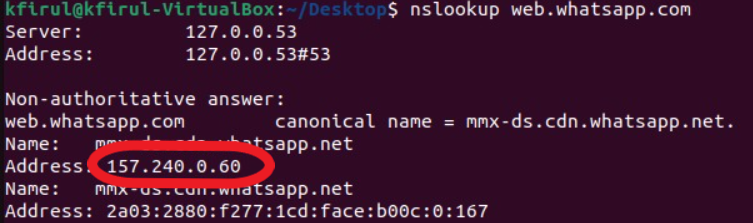

2. We identified the IP of WhatsApp Web using the `nslookup` code (note that it changes).


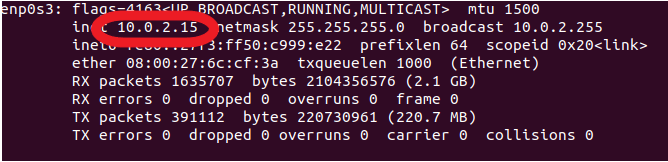

We have arrived at additional conclusions, which we will elaborate on below.

# Import Libraries

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 <span style="font-size: x-large;">  

 A function that generates a graph displaying packets by their times compared to their respective lengths.

In [302]:
def create_packet_length_bar_graph(data, xlabel, ylabel, title, color='black'):
    # Convert 'Time' column to numeric (seconds)
    data['Time'] = pd.to_numeric(data['Time'])

    # Extract the "Length" column and calculate the Ethernet payload lengths
    data_length = data['Length'] 

    # Create the bar graph
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(data['Time'], data_length, color=color)  # Use 'Time' column for x-axis
    plt.xlabel(xlabel)  # Set x-axis label
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [303]:
# Read the CSV file
data_MixTextVideo = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\MixTextVideo.csv')
data_MixTextVideo = data_MixTextVideo.drop(['No.'] , axis=1)

data_MixTextVideo

,Time,Source,Destination,Protocol,Length,Info
0,4.574620,10.0.2.15,157.240.0.60,TLSv1.2,124,Application Data
1,4.575098,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=1 Ack=71 Win=65535 Len=0
2,4.740392,157.240.0.60,10.0.2.15,TLSv1.2,126,Application Data
3,4.740450,10.0.2.15,157.240.0.60,TCP,54,56326 > 443 [ACK] Seq=71 Ack=73 Win=64022 Len=0
4,6.295326,10.0.2.15,157.240.0.60,TLSv1.2,118,Application Data
...,...,...,...,...,...,...
806,115.746863,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=8857 Ack=1641 Win=6553...
807,115.793791,10.0.2.15,157.240.0.60,TLSv1.2,156,Application Data
808,115.794387,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=8857 Ack=1743 Win=6553...
809,115.988090,157.240.0.60,10.0.2.15,TLSv1.2,143,Application Data


<span style="font-size: x-large;">  
We initiated a project focused on determining the nature of content within WhatsApp packets, discerning whether they contain text, video, audio, or files. Our initial approach involves exploring filtering techniques, beginning with a test involving only text and video content to identify any observable differences.



</span>


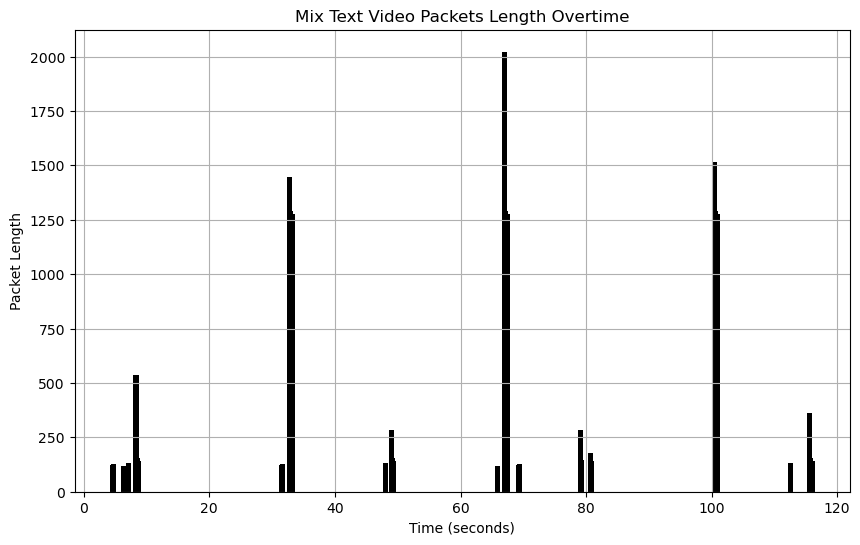

In [304]:
create_packet_length_bar_graph(data_MixTextVideo, 'Time (seconds)', 'Packet Length', 'Mix Text Video Packets Length Overtime', color='black')

<span style="font-size:x-large;">  
After looking at the graph, which shows packets over time, I can see there's a big group of large packets and a smaller group of smaller packets. Since We sent a video first, followed by a text message, and repeated this sequence several times, it seems like the bigger packets represent videos and the smaller packets represent text.






</span>


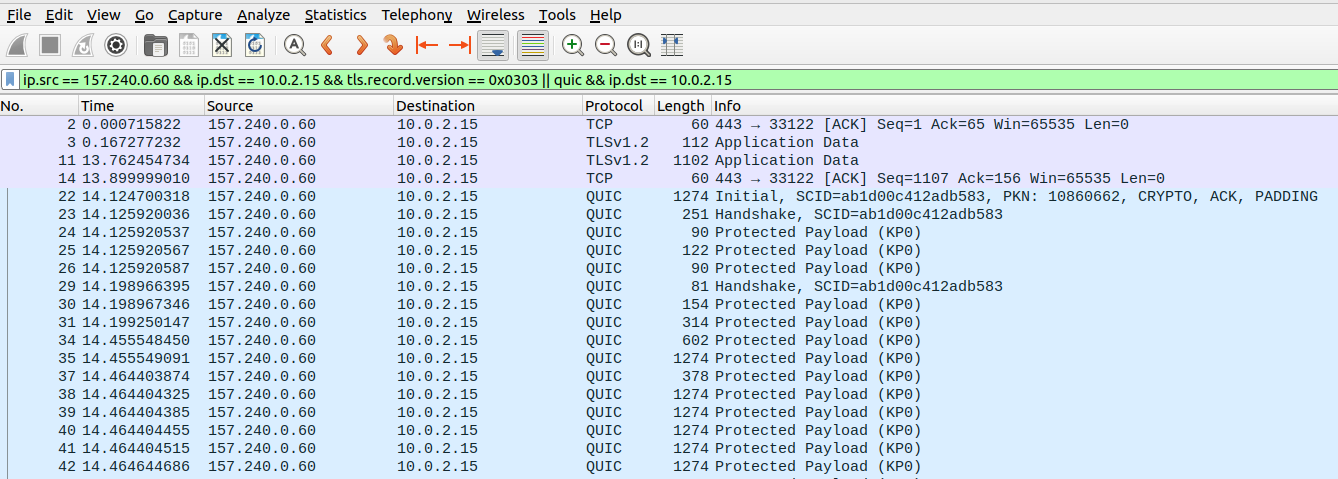

<span style="font-size: x-large;">  
After examining Wireshark, we observed that text messages don't seem to be sent through the QUIC protocol. Consequently, we will attempt to filter based solely on this protocol to identify the packet clusters containing videos.

</span>


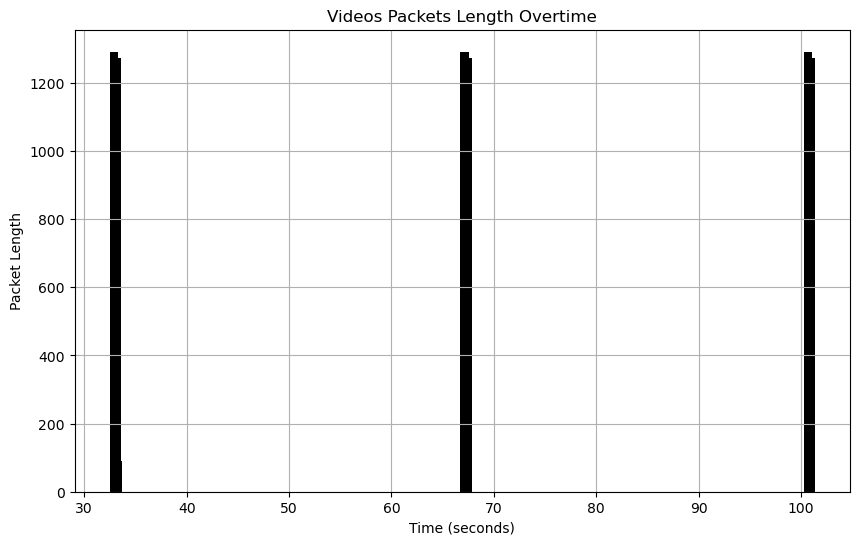

In [305]:
# Convert 'Time' column to numeric (seconds)
data_MixTextVideo['Time'] = pd.to_numeric(data_MixTextVideo['Time'])
data_MixTextVideo =data_MixTextVideo[data_MixTextVideo['Protocol'] == 'QUIC']
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Video_Length = data_MixTextVideo['Length']  

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_MixTextVideo['Time'], data_Video_Length,color ="black")  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Videos Packets Length Overtime')
plt.grid(True)
plt.show()

<span style="font-size: x-large;">  


Given that in the test we conducted, we sent 3 text messages and 3 video clips, it's noticeable that we were able to isolate the packets corresponding to the videos, which are displayed over time.




</span>


<span style="font-size: x-large;">  

We then proceeded to conduct an experiment that involved sending text, an image, and a video in order to identify each type of content.





</span>


In [306]:
# Read the CSV file
data_MixTIV = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\MixTIV.csv')
data_MixTIV = data_MixTIV.drop(['No.'] , axis=1)

data_MixTIV

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.0.2.15,157.240.0.60,TLSv1.2,124,Application Data
1,0.000605,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=1 Ack=71 Win=65535 Len=0
2,0.161704,157.240.0.60,10.0.2.15,TLSv1.2,126,Application Data
3,0.161740,10.0.2.15,157.240.0.60,TCP,54,56326 > 443 [ACK] Seq=71 Ack=73 Win=62780 Len=0
4,6.165160,157.240.0.60,10.0.2.15,TLSv1.2,285,Application Data
...,...,...,...,...,...,...
573,92.707530,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=11382 Ack=2211 Win=655...
574,92.769408,10.0.2.15,157.240.0.60,TLSv1.2,157,Application Data
575,92.769784,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=11382 Ack=2314 Win=655...
576,92.933642,157.240.0.60,10.0.2.15,TLSv1.2,144,Application Data


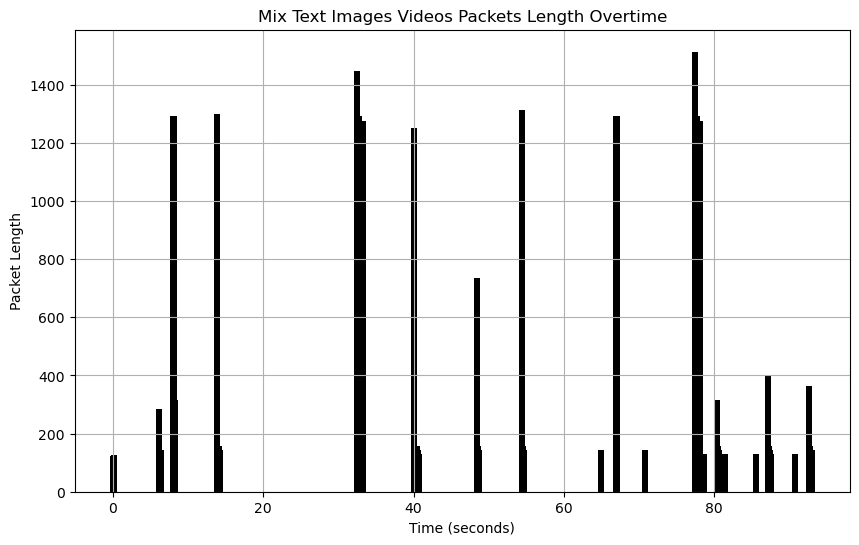

In [307]:
create_packet_length_bar_graph(data_MixTIV, 'Time (seconds)', 'Packet Length', 'Mix Text Images Videos Packets Length Overtime', color='black')

<span style="font-size: x-large;">  


It's evident that the current filtering approach we initially considered didn't assist us in distinguishing between images and videos. The number of packets on the graph seems similar for both. In contrast, text packets appear smaller on the graph, although certainty is limited as noise might also be recorded. Consequently, we will begin attempting to identify each content type separately by attributing specific characteristics to each group, aiming to arrive at alternative conclusions.




</span>


<span style="font-size: x-large;">  

 A function that generates a graph displaying packets sent at Groups withe threshold compared to their respective lengths.

In [308]:
def create_group_packet_bar_graph(data, xlabel, ylabel, title,threshold):

    # Group the data by delay intervals and sum the packet lengths
    data_grouped = data.groupby(data['Delay'].gt(threshold).cumsum())['Length'].sum()

    # Create the bar graph
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

<span style="font-size: x-large;">
PDF graph is a graphical representation that shows the distribution of continuous data along a specific range of values. It is commonly used in statistics and data analysis to visualize how the values are spread out within a dataset.
    
Our PDF graph represents the distribution of inter-arrival times (time gaps between consecutive events) for network packet arrivals.
The x-axis would show the inter-arrival times in seconds.
The y-axis shows the probability density of each inter-arrival time.
By plotting a histogram (a bar graph that shows the frequency of different inter-arrival time ranges) and fitting an exponential distribution curve over it, you're visually comparing the empirical data distribution with a theoretical distribution, allowing you to assess how well the theoretical model matches your actual data.

</span>


In [309]:
def generate_and_plot_pdf_with_exponential_fit(df, bins=10):

    df_cleaned = df.dropna(subset=['Delay'])
    
    counts, bin_edges = np.histogram(df_cleaned['Delay'], bins=bins, density=True)
    
    # Convert counts to probabilities
    pdf = counts / sum(counts)
    
    plt.figure(figsize=(10, 6))
    
    # Plotting the outline of the histogram using plt.step
    plt.step(bin_edges[:-1], pdf, where='post', color='blue', lw=2, label='PDF')
    
    # Estimate lambda (rate parameter) from the data
    lambd = 1. / np.mean(df['Delay'])
    
    # Compute the bin width from the first two bin edges
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Adjust the scale_factor with respect to bin_width
    scale_factor = max(pdf) / (lambd * np.exp(-lambd * bin_edges[np.argmax(pdf)]))
    
    # Create x values for the fitted exponential curve
    x = np.linspace(0, max(bin_edges), 500)
    
    # Calculate exponential distribution values using the estimated lambda
    y = scale_factor * lambd * np.exp(-lambd * x)
    
    plt.plot(x, y, color='red', lw=2, label='Fitted Exponential Distribution')
    
    plt.xlabel('Inter-Arrival Time')
    plt.ylabel('Density')
    plt.title('PDF of Inter-Arrival Time and Fitted Exponential Distribution')
    plt.legend()
    plt.grid(True)
    
    plt.show()

## Images

<span style="font-size: x-large;">  
We will commence working on a group that exclusively contains images, without any other types of content.

</span>


<span style="font-size: x-large;">  



We will add a column named "Delay" that describes the differences between the various recorded packets.



</span>


In [310]:
# Read the CSV file into a DataFrame
data_Images = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Images.csv')
# data_Images = pd.read_csv('C:\\NetworkProject\\CsvFiles\\Images.csv')
data_Images = data_Images.drop(['No.'] , axis=1)
data_Images['Delay'] = pd.to_numeric(data_Images['Time']).diff()
data_Images

,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.170136,157.240.0.60,10.0.2.15,TLSv1.2,112,Application Data,NaN
1,1.627378,157.240.0.60,10.0.2.15,TLSv1.2,118,Application Data,1.457242e+00
2,1.730907,157.240.0.60,10.0.2.15,TLSv1.3,266,"Server Hello, Change Cipher Spec, Application ...",1.035288e-01
3,1.816041,157.240.0.60,10.0.2.15,TLSv1.3,299,"Application Data, Application Data",8.513434e-02
4,1.817875,157.240.0.60,10.0.2.15,TLSv1.3,98,Application Data,1.833529e-03
...,...,...,...,...,...,...,...
1486,177.341475,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),1.004890e-04
1487,177.341475,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),1.100000e-07
1488,177.341475,213.57.24.97,10.0.2.15,QUIC,282,Protected Payload (KP0),2.100001e-08
1489,177.378110,213.57.24.97,10.0.2.15,QUIC,90,Protected Payload (KP0),3.663472e-02


<span style="font-size: x-large;">  


Now, after recording about 3 minutes of sending images, during which we sent a total of 12 images, we will present the graph illustrating the packets that were sent over time.




</span>


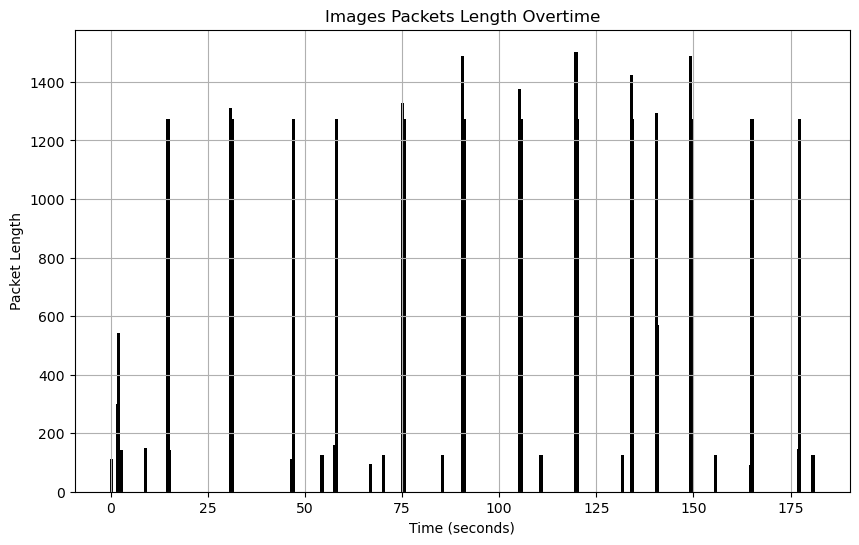

In [311]:
create_packet_length_bar_graph(data_Images, 'Time (seconds)', 'Packet Length', 'Images Packets Length Overtime', color='black')

<span style="font-size: x-large;">  


We can observe that it's not entirely possible to distinguish between images and noise since the packets are scattered. We will attempt to define a specific threshold and assume that based on this difference, there's a need to group packets together, assuming they belong to the same image that was sent. Subsequently, we will sum up each group separately and try to filter out small packets that have been grouped.




</span>


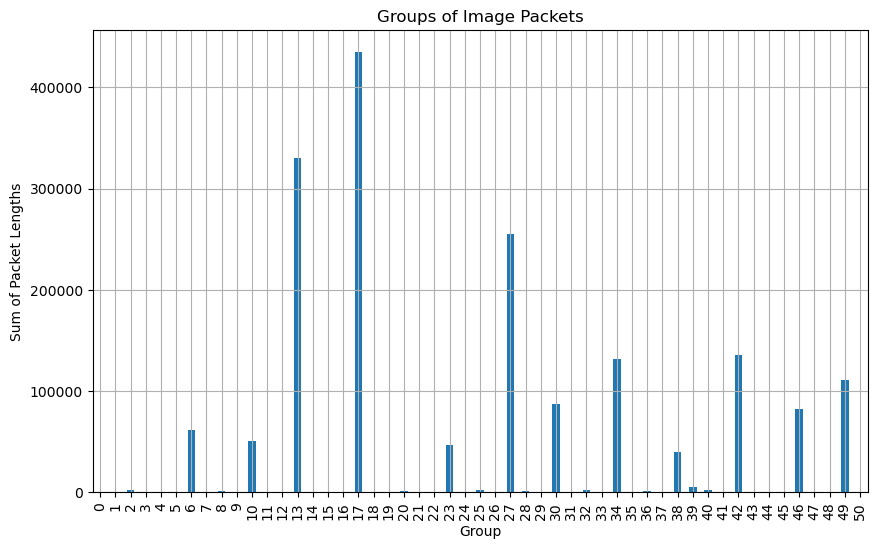

In [312]:
create_group_packet_bar_graph(data_Images,'Group','Sum of Packet Lengths',f'Groups of Image Packets',0.1)

<span style="font-size: x-large;">  



In the generated graph, it's clear that there are 12 distinct groups of packets, corresponding to the images. Concurrently, there is still minimal noise present, but based on the size, it's apparent that the noise packets do not contain the image data.



</span>


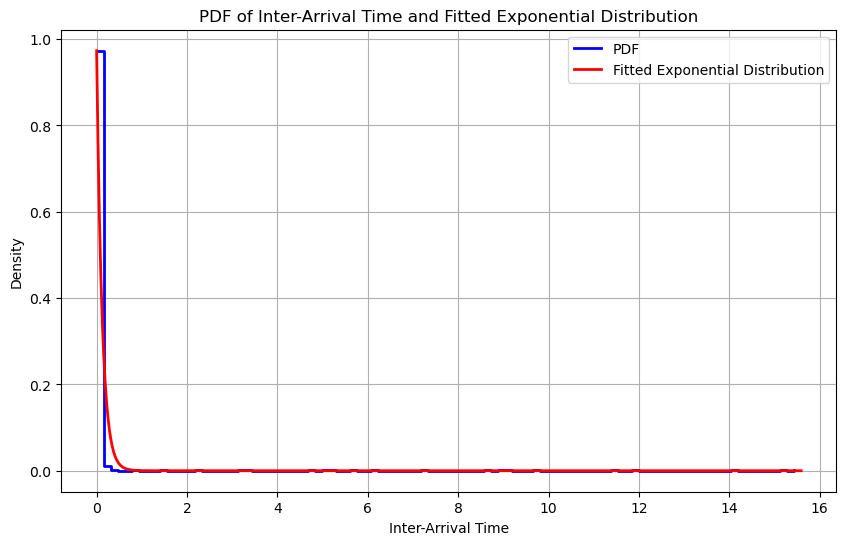

In [313]:
generate_and_plot_pdf_with_exponential_fit(data_Images, bins=100)


<span style="font-size: x-large;">

It can be inferred from observing the graph that packets sent with very low time intervals have a significantly high probability of being closely related to each other.

<span style="font-size: x-large;">

We will save the average size of the images for the following graphs.
We want to save only what we defined as an image and not calculate the noises as they will affect the average calculation.
Therefore, from observing the graph, we will select only the sizes above 4000.

</span>

In [314]:
data_grouped = data_Images.groupby(data_Images['Delay'].gt(threshold).cumsum())['Length'].sum()
average_of_Images = data_grouped[data_grouped > 4000].mean()
average_of_Images

136086.6923076923

# Files

<span style="font-size: x-large;">  



We will now verify if the filtering approach we found for images also works for files. We will record a session in WhatsApp where only files are being sent, with a similar size distribution and no significant deviations. The recording will span around 3 minutes and include the transmission of 10 files.



</span>


<span style="font-size: x-large;">  


We will also include the new column called "Delay" here.




</span>


In [315]:
# Read the CSV file into a DataFrame
data_Files = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Files.csv')
# data_Files = pd.read_csv('C:\\NetworkProject\\CsvFiles\\Files.csv')
data_Files = data_Files.drop(['No.'] , axis=1)
data_Files['Delay'] = pd.to_numeric(data_Files['Time']).diff()
data_Files

,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.082465,157.240.0.60,10.0.2.15,TLSv1.2,788,"Application Data, Application Data",NaN
1,0.370200,157.240.0.60,10.0.2.15,QUIC,1274,"Initial, SCID=961d00321409a208, PKN: 15326337,...",2.877349e-01
2,0.370200,157.240.0.60,10.0.2.15,QUIC,251,"Handshake, SCID=961d00321409a208",3.910000e-07
3,0.372108,157.240.0.60,10.0.2.15,QUIC,90,Protected Payload (KP0),1.907908e-03
4,0.372358,157.240.0.60,10.0.2.15,QUIC,122,Protected Payload (KP0),2.496500e-04
...,...,...,...,...,...,...,...
4945,173.342415,157.240.0.60,10.0.2.15,QUIC,1274,Protected Payload (KP0),5.999999e-08
4946,173.342415,157.240.0.60,10.0.2.15,QUIC,1274,Protected Payload (KP0),2.100001e-08
4947,173.395569,157.240.0.60,10.0.2.15,QUIC,90,Protected Payload (KP0),5.315436e-02
4948,173.412412,157.240.0.60,10.0.2.15,QUIC,90,Protected Payload (KP0),1.684304e-02


<span style="font-size: x-large;">  


Let's first take a look at the graph that depicts the results based on the filtering we found, before we grouped the packets.




</span>


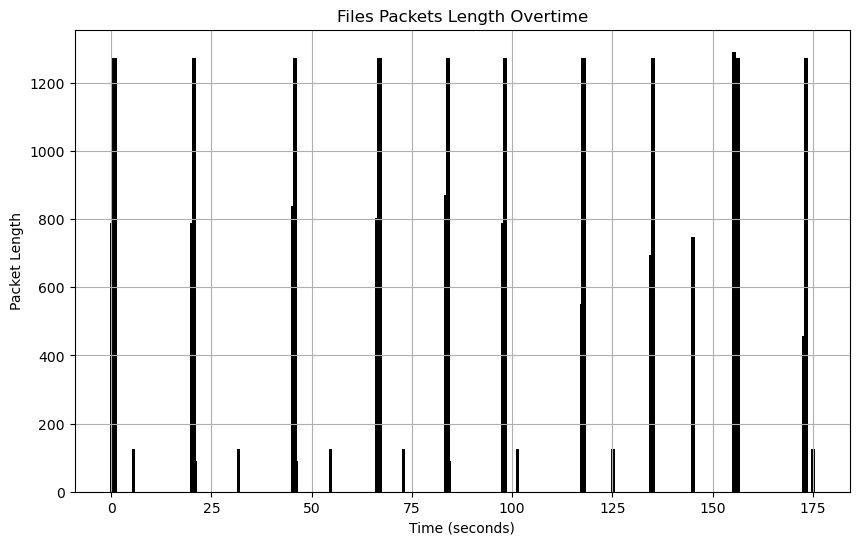

In [316]:
create_packet_length_bar_graph(data_Files, 'Time (seconds)', 'Packet Length', 'Files Packets Length Overtime', color='black')

<span style="font-size: x-large;">  


We will now proceed to group the packets based on the time differences between them.




</span>


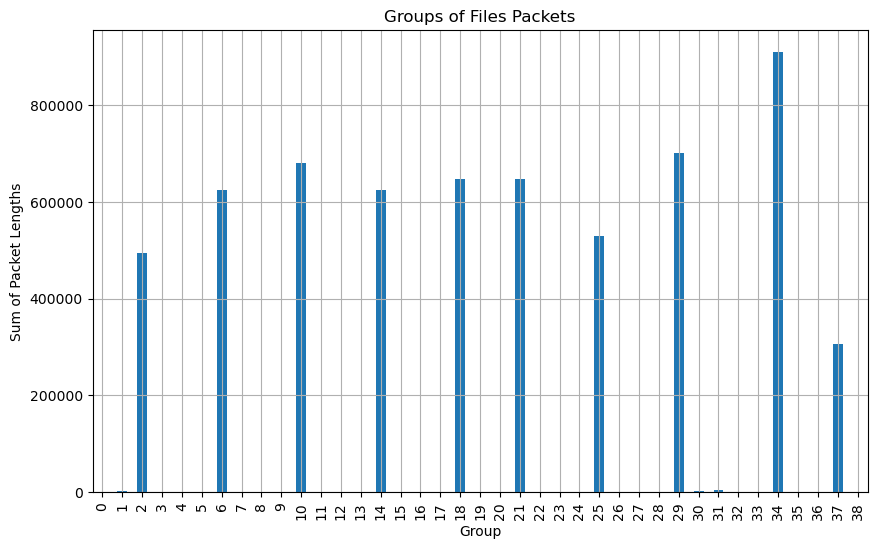

In [317]:
create_group_packet_bar_graph(data_Files,'Group','Sum of Packet Lengths',f'Groups of Files Packets',0.1)

<span style="font-size: x-large;">  


Now, after the grouping, we can clearly observe 10 dominant clusters, which represent the groups of packets containing data regarding the files we sent. Additionally, there are also very small clusters, which can be inferred as background noise that was recorded, containing no significant information about the files.




</span>


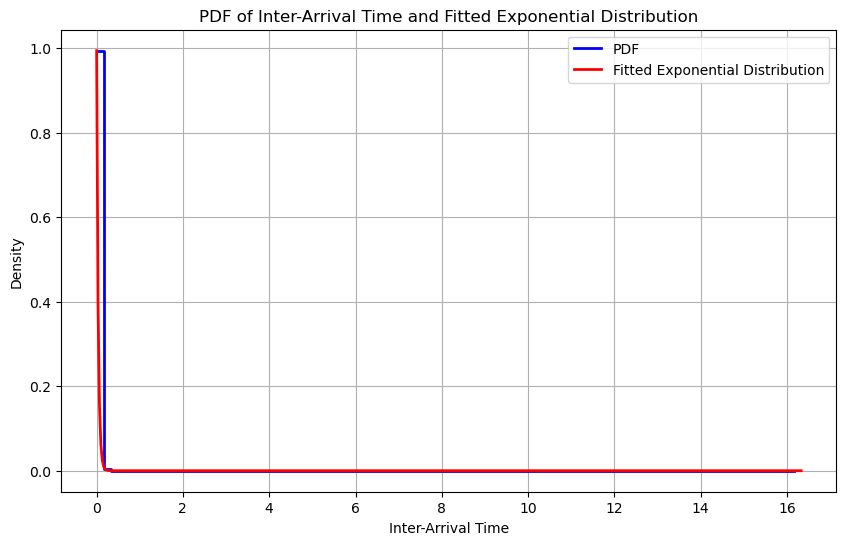

In [318]:
generate_and_plot_pdf_with_exponential_fit(data_Files, bins=100)


<span style="font-size: x-large;">

It can be inferred from observing the graph that packets sent with very low time intervals have a significantly high probability of being closely related to each other.

<span style="font-size: x-large;">

We will save the average size of the files for the following graphs.
We want to save only what we defined as an file and not calculate the noises as they will affect the average calculation.
Therefore, from observing the graph, we will select only the sizes above 25000.

</span>

In [319]:
data_grouped = data_Files.groupby(data_Files['Delay'].gt(threshold).cumsum())['Length'].sum()
average_of_Files = data_grouped[data_grouped > 25000].mean()
average_of_Files

616645.8

<span style="font-size: x-large;">  



It can be inferred that the filtering we discovered is effective here as well. We will proceed to the next group.



</span>


# Videos

<span style="font-size: x-large;">  


We will now proceed to record the transmission of videos in a WhatsApp group. We recorded the group's activity for approximately 3 minutes, during which we sent 3 videos with varying sizes.




</span>


<span style="font-size: x-large;">  

Here as well, we will add the "Delay" column, just like we did for each table.





</span>


In [320]:
# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Video.csv')
# data_Video = pd.read_csv('C:\\NetworkProject\\CsvFiles\\Video.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()
data_Video

,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.221994,157.240.0.60,10.0.2.15,TLSv1.2,128,Application Data,NaN
1,0.244895,157.240.0.60,10.0.2.15,TLSv1.2,128,Application Data,2.290101e-02
2,18.657686,157.240.0.60,10.0.2.15,TLSv1.2,466,"Application Data, Application Data",1.841279e+01
3,18.821473,213.57.24.97,10.0.2.15,QUIC,1274,"Initial, SCID=9d81000620eb1c51, PKN: 3474616, ...",1.637866e-01
4,18.821474,213.57.24.97,10.0.2.15,QUIC,250,"Handshake, SCID=9d81000620eb1c51",8.420000e-07
...,...,...,...,...,...,...,...
14917,167.571204,157.240.0.60,10.0.2.15,TLSv1.2,126,Application Data,2.115151e+00
14918,172.053599,157.240.0.60,10.0.2.15,TLSv1.2,112,Application Data,4.482395e+00
14919,172.071647,157.240.0.60,10.0.2.15,TLSv1.2,149,Application Data,1.804771e-02
14920,172.073397,157.240.0.60,10.0.2.15,TLSv1.2,143,Application Data,1.750879e-03


<span style="font-size: x-large;">  



We can observe that in the data here, even after filtering, there are around 15,000 rows in the table compared to the other tables which were significantly smaller. This is because we sent heavy videos, which resulted in recording a lot more data points.



</span>


<span style="font-size: x-large;">  


Now we will present the graph of the Packets over time, without grouping them by the delays.




</span>


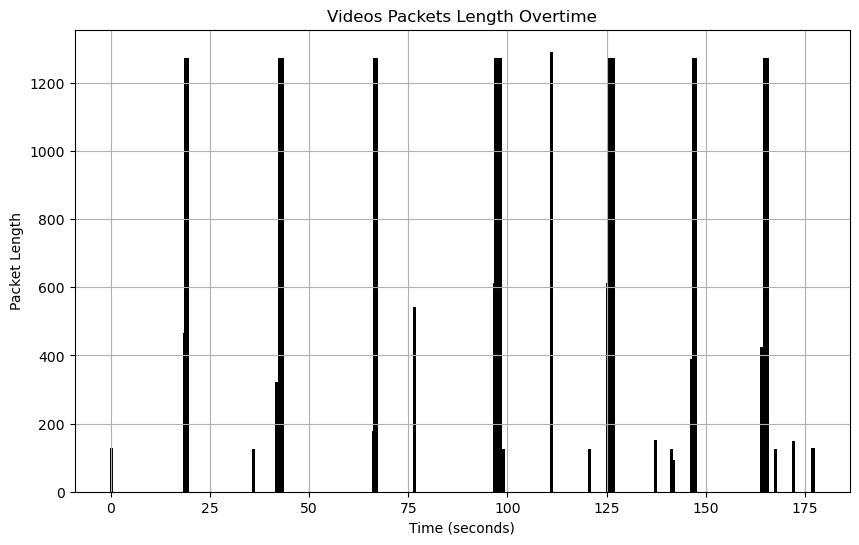

In [321]:
create_packet_length_bar_graph(data_Video, 'Time (seconds)', 'Packet Length', 'Videos Packets Length Overtime', color='black')

<span style="font-size: x-large;">  



The graph still doesn't make it clear which packets belong to the video and which packets are noise. Therefore, we will consolidate the packets based on time intervals.



</span>


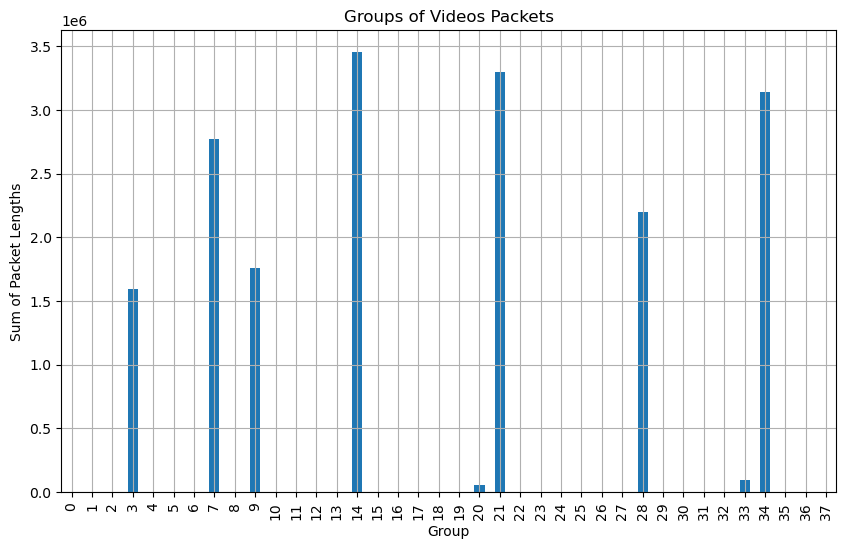

In [322]:
create_group_packet_bar_graph(data_Video,'Group','Sum of Packet Lengths',f'Groups of Videos Packets',0.1)

<span style="font-size: x-large;">  


Now it's evident that there are 7 distinct groups of packets that are potential candidates to be the packets containing video data. Simultaneously, there are very small groups that can be inferred as noise.

Given that there are exactly 7 significant groups, we can conclude that these are the groups representing the sent videos.




</span>


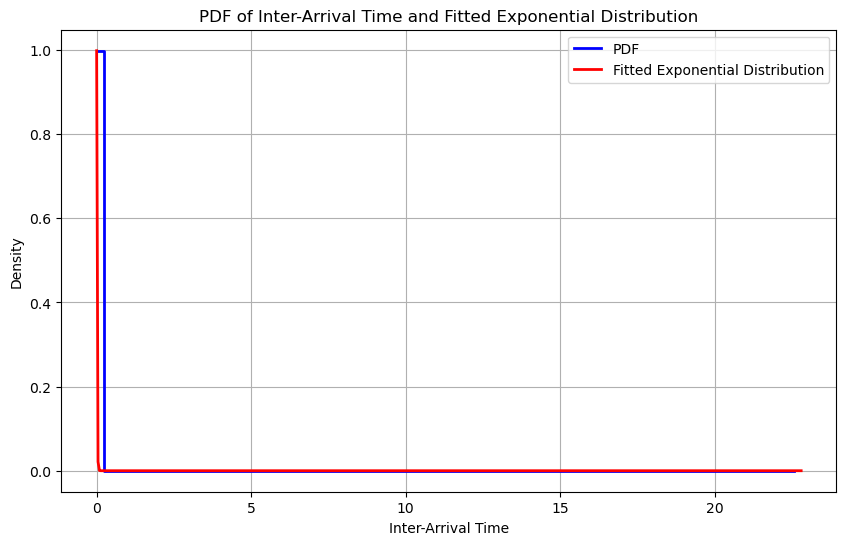

In [323]:
generate_and_plot_pdf_with_exponential_fit(data_Video, bins=100)


<span style="font-size: x-large;">

It can be inferred from observing the graph that packets sent with very low time intervals have a significantly high probability of being closely related to each other.

<span style="font-size: x-large;">

We will save the average size of the videos for the following graphs.
We want to save only what we defined as an video and not calculate the noises as they will affect the average calculation.
Therefore, from observing the graph, we will select only the sizes above 200000.

</span>

In [324]:
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()
average_of_Videos = data_grouped[data_grouped > 200000].mean()
average_of_Videos

2601006.714285714

# Text

In [325]:
# Read the CSV file into a DataFrame
data_Text = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Text.csv')
data_Text = data_Text.drop(['No.'] , axis=1)
data_Text['Delay'] = pd.to_numeric(data_Text['Time']).diff()

data_Text

,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.676755,157.240.221.60,10.0.2.15,TCP,60,443 > 36966 [ACK] Seq=1 Ack=71 Win=65535 Len=0,NaN
1,0.834949,157.240.221.60,10.0.2.15,TLSv1.2,126,Application Data,0.158194
2,5.915235,157.240.221.60,10.0.2.15,TLSv1.2,1312,Application Data,5.080286
3,6.257159,157.240.221.60,10.0.2.15,TCP,60,443 > 36966 [ACK] Seq=1331 Ack=162 Win=65535...,0.341925
4,18.481758,157.240.221.60,10.0.2.15,TCP,1402,"443 > 36966 [PSH, ACK] Seq=1331 Ack=162 Win=...",12.224599
...,...,...,...,...,...,...,...
64,176.072205,157.240.221.60,10.0.2.15,TCP,1402,"443 > 36966 [PSH, ACK] Seq=41291 Ack=1545 Wi...",0.005386
65,176.078074,157.240.221.60,10.0.2.15,TLSv1.2,1301,Application Data,0.005868
66,176.089224,157.240.221.60,10.0.2.15,TCP,2750,"443 > 36966 [PSH, ACK] Seq=43886 Ack=1545 Wi...",0.011150
67,176.091838,157.240.221.60,10.0.2.15,TLSv1.2,1631,"Application Data, Application Data",0.002614


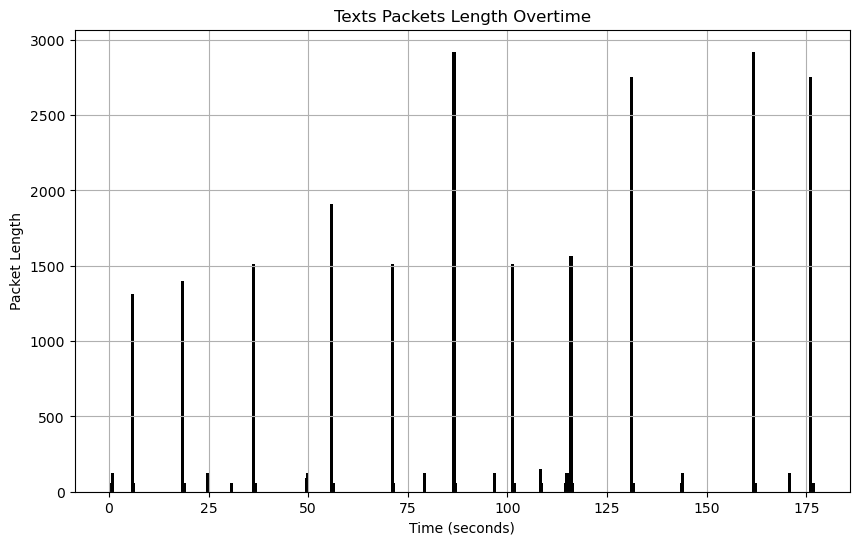

In [326]:
create_packet_length_bar_graph(data_Text, 'Time (seconds)', 'Packet Length', 'Texts Packets Length Overtime', color='black')

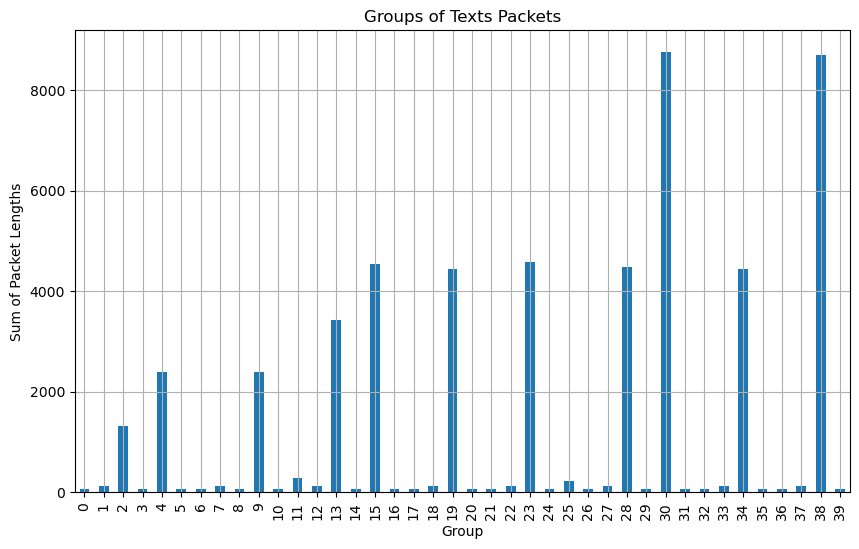

In [327]:
create_group_packet_bar_graph(data_Text,'Group','Sum of Packet Lengths',f'Groups of Texts Packets',0.1)

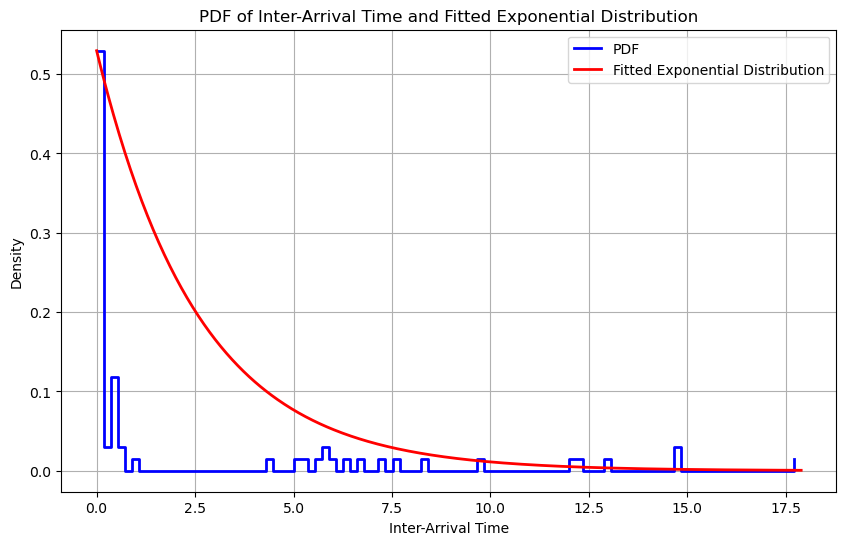

In [328]:
generate_and_plot_pdf_with_exponential_fit(data_Text, bins=100)


<span style="font-size: x-large;">

Unlike the previous message types, here the probability of packets with very low time intervals between them being closely related is relatively lower. This can be explained by the fact that text packets are shorter in length. As a result, the remaining "noise" is almost comparable to the size of the text packets, reducing the likelihood of close association between them.

<span style="font-size: x-large;">

We will save the average size of the videos for the following graphs.
We want to save only what we defined as an video and not calculate the noises as they will affect the average calculation.
Therefore, from observing the graph, we will select only the sizes above 200000.

</span>

In [329]:
data_grouped = data_Text.groupby(data_Text['Delay'].gt(threshold).cumsum())['Length'].sum()
average_of_Text = data_grouped[data_grouped > 2000].mean()
average_of_Text

4811.5

# Mix

<span style="font-size: x-large;">  


Now that we've identified the characteristics of each group separately, let's try again to identify, from within a group where all types of messages are sent, which type of message was sent.




</span>


<span style="font-size: x-large;">  


We will present the average graph in order to provide us with a better perspective to understand the sizes of each message type.



</span>

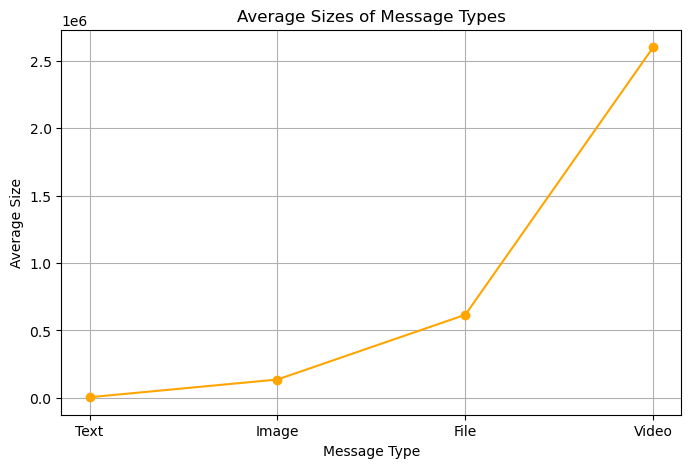

In [330]:
import matplotlib.pyplot as plt

# Message types
message_types = ['Text', 'Image', 'File','Video']

# Average values
average_values = [average_of_Text, average_of_Images, average_of_Files,average_of_Videos]

plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
plt.plot(message_types, average_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Message Type')
plt.ylabel('Average Size')
plt.title('Average Sizes of Message Types')
plt.grid(True)
plt.show()



<span style="font-size: x-large;">  

Let's start by sending different types of messages in the same sequence. We'll start with a small example where we send an image, then a file, and then a video twice in that order. We will then try to identify the types based on the sizes of the packets over time.





</span>


<span style="font-size: x-large;">  



As always, we'll add the "Delay" column.



</span>


In [331]:
# Read the CSV file into a DataFrame
data_Mix1 = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\MixTest.csv')
# data_Mix1 = pd.read_csv('C:\\NetworkProject\\CsvFiles\\MixTest.csv')
data_Mix1 = data_Mix1.drop(['No.'] , axis=1)
data_Mix1['Delay'] = pd.to_numeric(data_Mix1['Time']).diff()
data_Mix1



,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.000000,157.240.0.60,10.0.2.15,TLSv1.2,93,Application Data,NaN
1,7.287422,157.240.0.60,10.0.2.15,TLSv1.2,71,Application Data,7.287422e+00
2,7.503120,213.57.24.97,10.0.2.15,QUIC,1274,"Initial, SCID=b68100094b0971d5, PKN: 7703410, ...",2.156973e-01
3,7.503120,213.57.24.97,10.0.2.15,QUIC,250,"Handshake, SCID=b68100094b0971d5",4.210000e-07
4,7.503120,213.57.24.97,10.0.2.15,QUIC,122,Protected Payload (KP0),3.000000e-08
...,...,...,...,...,...,...,...
8779,130.241281,213.57.24.97,10.0.2.15,QUIC,90,Protected Payload (KP0),8.562000e-05
8780,130.241410,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),1.292720e-04
8781,130.241499,213.57.24.97,10.0.2.15,QUIC,90,Protected Payload (KP0),8.887700e-05
8782,130.241605,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),1.059590e-04


<span style="font-size: x-large;">  




Now we'll present a graph of the packets over time after recording the transmission for approx 2 minutes.


</span>


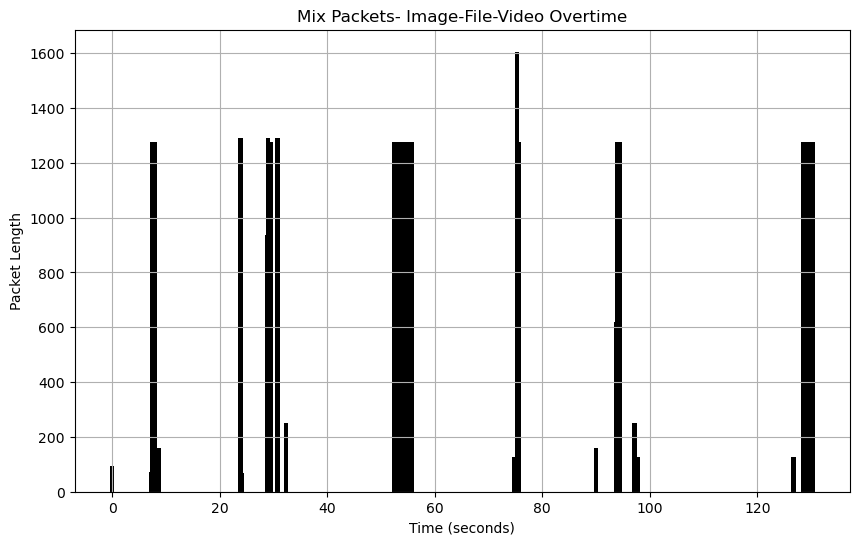

In [332]:
create_packet_length_bar_graph(data_Mix1, 'Time (seconds)', 'Packet Length', 'Mix Packets- Image-File-Video Overtime', color='black')

<span style="font-size: x-large;">  


It's still difficult to precisely identify the message type. Therefore, we will proceed with consolidation by the delay collum




</span>


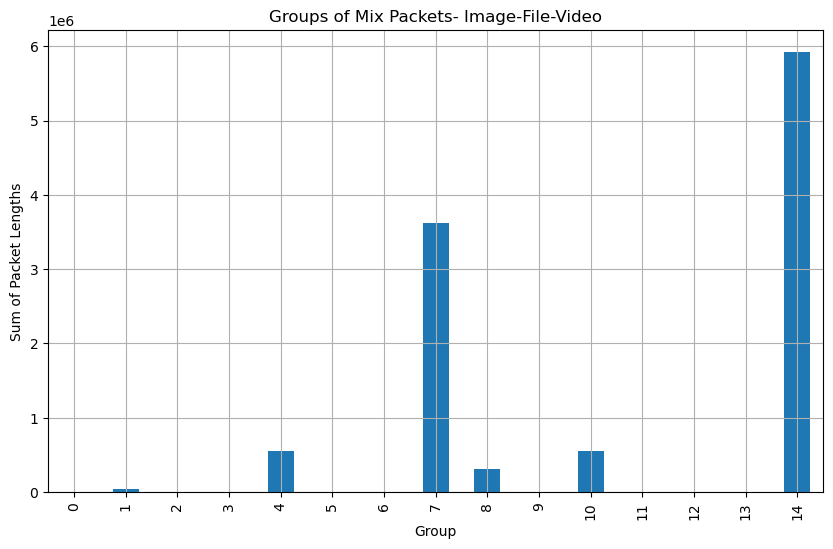

In [333]:
create_group_packet_bar_graph(data_Mix1,'Group','Sum of Packet Lengths',f'Groups of Mix Packets- Image-File-Video',0.5)

<span style="font-size: x-large;">  


After the consolidation of packets that we performed, it's now clear to identify the different sizes. The first group represents an image, the second group represents a file, and the third group represents a video, in that order.

As expected, the size of the video packets' group is significantly larger than the other types, just as we anticipated.




</span>


<span style="font-size: x-large;">  

Now we will conduct an experiment where we send text, image, file, and video messages, not in any specific order. We will record WhatsApp for 3 minutes while sending these different types randomly.





</span>


<span style="font-size: x-large;">  


Certainly, here as well, we will need to add the DELAY column.




</span>


In [334]:
# Read the CSV file into a DataFrame
data_Mix2 = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Mix.csv')
# data_Mix2 = pd.read_csv('C:\\NetworkProject\\CsvFiles\\Mix.csv')
data_Mix2 = data_Mix2.drop(['No.'] , axis=1)
data_Mix2['Delay'] = pd.to_numeric(data_Mix2['Time']).diff()
data_Mix2



,Time,Source,Destination,Protocol,Length,Info,Delay
0,0.167277,157.240.0.60,10.0.2.15,TLSv1.2,112,Application Data,NaN
1,13.762455,157.240.0.60,10.0.2.15,TLSv1.2,1102,Application Data,1.359518e+01
2,14.124700,157.240.0.60,10.0.2.15,QUIC,1274,"Initial, SCID=ab1d00c412adb583, PKN: 10860662,...",3.622456e-01
3,14.125920,157.240.0.60,10.0.2.15,QUIC,251,"Handshake, SCID=ab1d00c412adb583",1.219718e-03
4,14.125921,157.240.0.60,10.0.2.15,QUIC,90,Protected Payload (KP0),5.010000e-07
...,...,...,...,...,...,...,...
7196,177.487015,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),5.810000e-07
7197,177.487015,213.57.24.97,10.0.2.15,QUIC,666,Protected Payload (KP0),4.110000e-07
7198,177.487016,213.57.24.97,10.0.2.15,QUIC,1274,Protected Payload (KP0),6.110000e-07
7199,177.487016,213.57.24.97,10.0.2.15,QUIC,922,Protected Payload (KP0),9.999999e-08


<span style="font-size: x-large;">  


Now we will create a graph of the packets over time using the provided data.




</span>


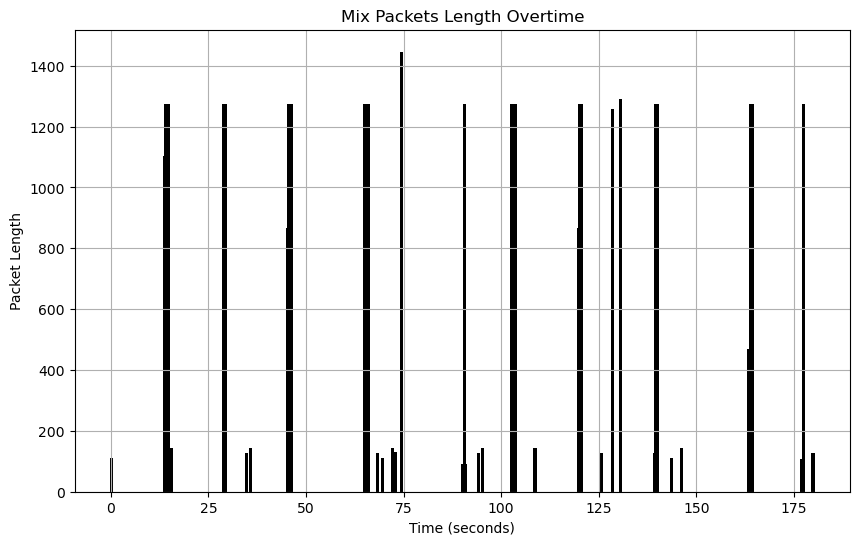

In [335]:
create_packet_length_bar_graph(data_Mix2, 'Time (seconds)', 'Packet Length', 'Mix Packets Length Overtime', color='black')

<span style="font-size: x-large;">  



Again, the graph here is still not organized, and we will need to consolidate the packets based on timestamps.
Considering all the findings we've made so far and based on the average sizes of each data type, we will try to color the appropriate group according to its type.


</span>


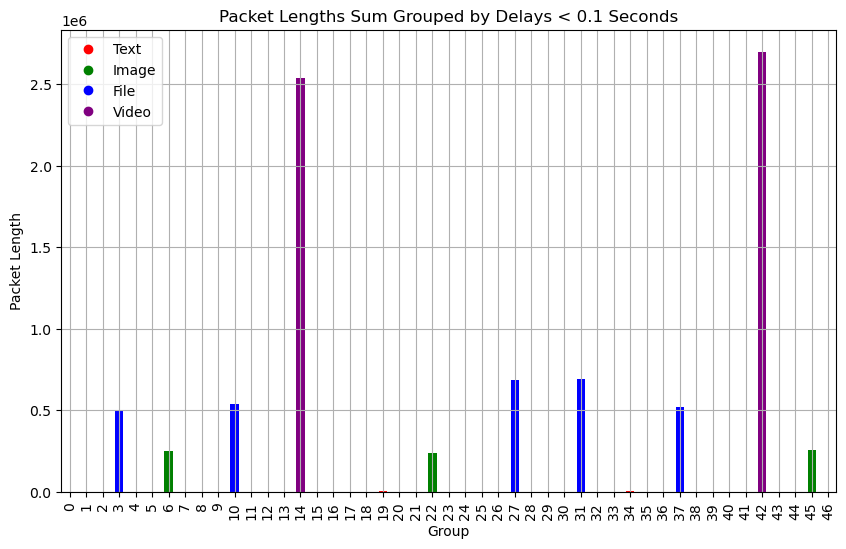

In [336]:


# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Mix2.groupby(data_Mix2['Delay'].gt(threshold).cumsum())['Length'].sum()


# Determine color categories based on conditions
color_categories = []
for value in data_grouped:
    if average_of_Text - average_of_Text/1.08 < value < average_of_Text + average_of_Text/1.08:
        color_categories.append('red')
    elif average_of_Images - average_of_Images/1.08 < value < average_of_Images + average_of_Images/1.08:
        color_categories.append('green')
    elif average_of_Files - average_of_Files/1.08 < value < average_of_Files + average_of_Files/1.08:
        color_categories.append('blue')
    else:
        color_categories.append('purple')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = data_grouped.plot(kind='bar', color=color_categories, label='Sum of Lengths')
ax.set_xlabel('Group')
ax.set_ylabel('Packet Length')
ax.set_title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')

# Create custom legend
legend_labels = {
    'red': 'Text',
    'green': 'Image',
    'blue': 'File',
    'purple': 'Video'
}
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=label)
           for color, label in legend_labels.items()]

ax.legend(handles=handles)
ax.grid(True)
plt.show()

<span style="font-size: x-large;">  



Now, we can see that we've colored the groups accordingly:
- Text in red (appears very small, but can be seen in groups 19 and 34)
- Image in green
- File in blue
- Video in purple

The classification has indeed succeeded, as it exactly matches the order of messages sent in the WhatsApp group.

We'll attach a partial image from the group that depicts the types of files sent in the recorded transmission.



</span>


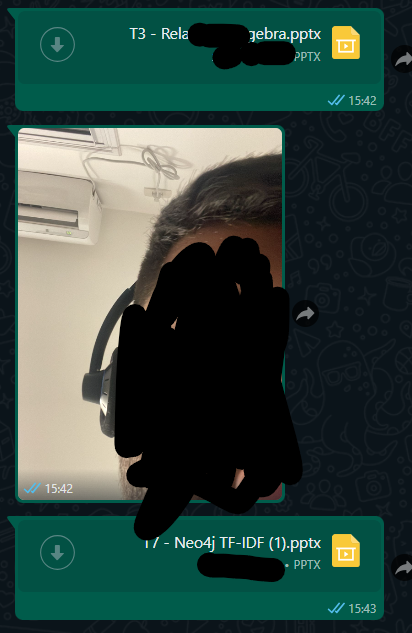

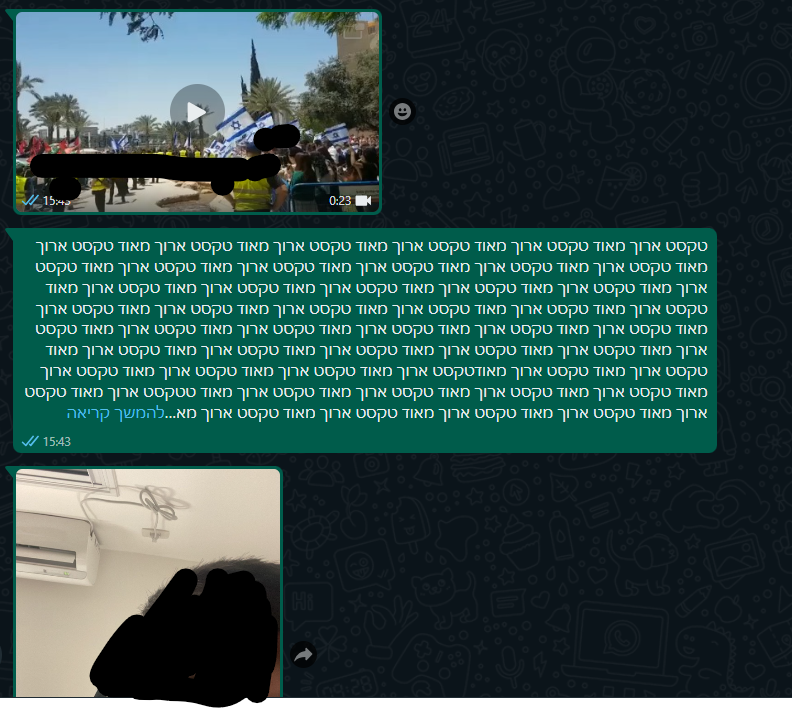

# Noise

<span style="font-size: x-large;">  


Now we'll try to identify files that were sent in WhatsApp, given deliberate "noise" we introduce – for example, playing a YouTube video in the background. We'll attempt to locate the WhatsApp messages and discern the YouTube activity.




</span>


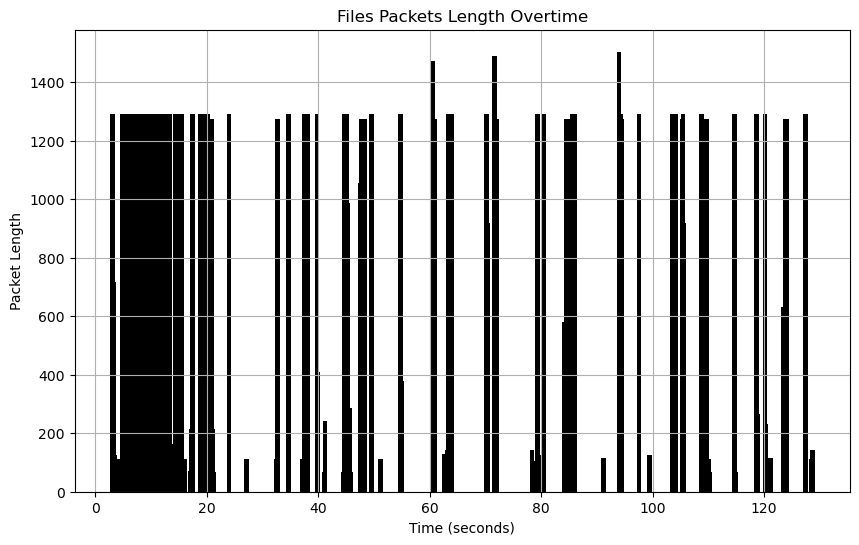

In [337]:
# Read the CSV file into a DataFrame
data_Noise = pd.read_csv('C:\\Users\\USER\\Desktop\\Computers_Network\\CsvFiles\\Noise.csv')
# data_Noise = pd.read_csv('C:\\NetworkProject\\CsvFiles\\Noise.csv')

data_Noise = data_Noise.drop(['No.'] , axis=1)
data_Noise['Delay'] = pd.to_numeric(data_Noise['Time']).diff()

# Convert 'Time' column to numeric (seconds)
data_Noise['Time'] = pd.to_numeric(data_Noise['Time'])
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Noise_Length = data_Noise['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Noise['Time'], data_Noise_Length,color="black")  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

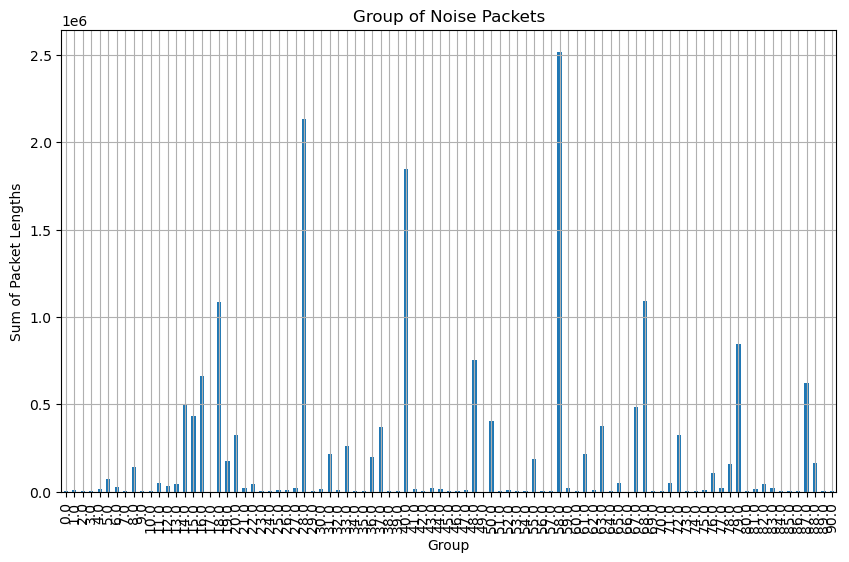

In [338]:
# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Noise['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Group of Noise Packets')
plt.grid(True)
plt.show()

<span style="font-size: x-large;">  


Even after consolidating the packets, it's still quite challenging to differentiate between the different sources.

Let's try a different approach. We already know the IP address of WhatsApp from the previous NSLOOKUP. Now, let's use Wireshark to identify which IP address belongs to YouTube. This way, we can classify the packets more accurately.




</span>


# צירוף תמונה של הויירשארק של המיקס לצורך זיהוי האייפי

<span style="font-size: x-large;">  


We noticed that there's an IP address we haven't encountered before while recording only WhatsApp. We recognized that the IP address starting with 172.217 belongs to YouTube. Therefore, we will filter the packets based on these two IP addresses and color each one differently to classify them.




</span>


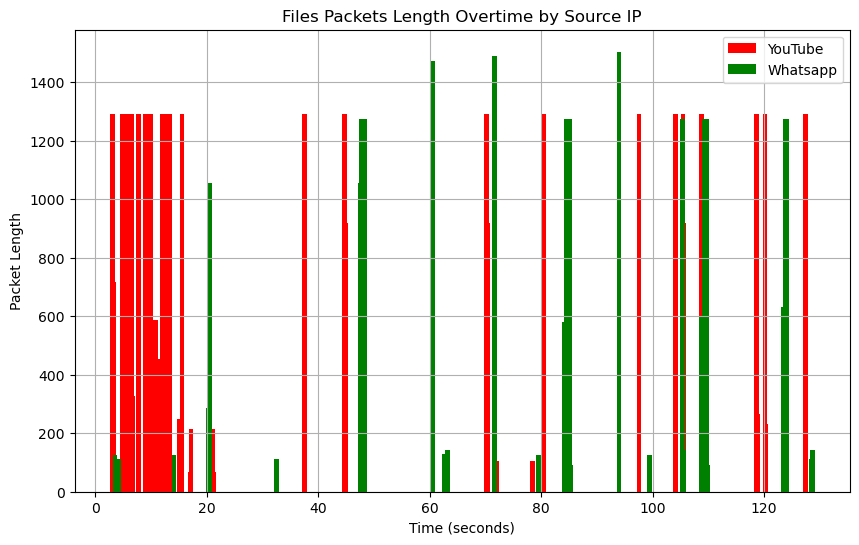

In [339]:
target_ip1 = '172.217'
# Create a mask for each source IP address
mask_ip1 = data_Noise['Source'].str.startswith(target_ip1)
mask_ip2 = data_Noise['Source'] == '157.240.0.60'

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Noise['Time'][mask_ip1], data_Noise_Length[mask_ip1], color='red', label='YouTube')
plt.bar(data_Noise['Time'][mask_ip2], data_Noise_Length[mask_ip2], color='green', label='Whatsapp')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime by Source IP')
plt.legend()  # Show legend indicating colors and labels
plt.grid(True)
plt.show()

<span style="font-size: x-large;">  


In the graph above, you can clearly see that all the packets colored in red belong to YouTube, and the packets colored in green belong to WhatsApp.

Based on how we conducted the recording—starting to record, playing a YouTube song, waiting for a few seconds, and then launching WhatsApp—you can indeed observe this pattern in the graph. Initially, there is a large amount of red-colored packets, and only after that do the green-colored packets of WhatsApp start to appear.




</span>
